In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice(Config(256, 4, 100), load_allen=True, load_parcel=True, load_preproc=True)

[PROGRESS] fit columnar: initiated

[PROGRESS] downsample: done

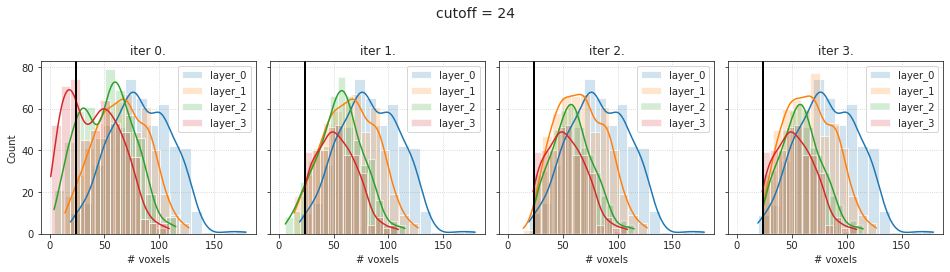

[PROGRESS] merge: done

Warning, region '163' is flat

Warning, region '178' is flat

Warning, region '193' is flat

[PROGRESS] erode: done

num merged regions,     left: 923,  right: 923
region id diff,         r - l:  Counter({1024: 923})

[PROGRESS] fit columnar: done

[PROGRESS] 'parcel_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4

[PROGRESS] save results: done.

In [3]:
mice.parcel.fit_parcel(True, cutoff=3)

In [4]:
from register.register import Register
reg = Register(mice)

In [5]:
reg.register_anat(True)

registering anat sub-SLC10_ses-3: 100%|██████████| 30/30 [14:13<00:00, 28.44s/it]


In [6]:
reg.organize_func()

organizing bold:  sub-SLC01_ses-2_run-1:   3%|▎         | 7/210 [01:39<46:21, 13.70s/it]  /home/hadi/Dropbox/git/_Ca-fMRI/register/register.py:827: RuntimeWarning:

Mean of empty slice.

/home/hadi/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning:

invalid value encountered in true_divide



Warnin! doing sub-SLC01_ses-2_run-1, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-2:   4%|▍         | 8/210 [01:53<45:49, 13.61s/it]

Warnin! doing sub-SLC01_ses-2_run-2, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-3:   4%|▍         | 9/210 [02:06<45:16, 13.51s/it]

Warnin! doing sub-SLC01_ses-2_run-3, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-4:   5%|▍         | 10/210 [02:20<45:01, 13.51s/it]

Warnin! doing sub-SLC01_ses-2_run-4, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-5:   5%|▌         | 11/210 [02:32<44:00, 13.27s/it]

Warnin! doing sub-SLC01_ses-2_run-5, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-6:   6%|▌         | 12/210 [02:45<43:37, 13.22s/it]

Warnin! doing sub-SLC01_ses-2_run-6, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC01_ses-2_run-7:   6%|▌         | 13/210 [02:58<42:50, 13.05s/it]

Warnin! doing sub-SLC01_ses-2_run-7, but empty mask found at '1042' = 2-18-0

organizing bold:  sub-SLC04_ses-2_run-1:  33%|███▎      | 70/210 [13:11<30:54, 13.25s/it]

Warnin! doing sub-SLC04_ses-2_run-1, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-2:  34%|███▍      | 71/210 [13:24<30:42, 13.26s/it]

Warnin! doing sub-SLC04_ses-2_run-2, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-3:  34%|███▍      | 72/210 [13:37<30:24, 13.22s/it]

Warnin! doing sub-SLC04_ses-2_run-3, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-4:  35%|███▍      | 73/210 [13:50<30:08, 13.20s/it]

Warnin! doing sub-SLC04_ses-2_run-4, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-5:  35%|███▌      | 74/210 [14:03<29:47, 13.14s/it]

Warnin! doing sub-SLC04_ses-2_run-5, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-6:  36%|███▌      | 75/210 [14:16<29:36, 13.16s/it]

Warnin! doing sub-SLC04_ses-2_run-6, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC04_ses-2_run-7:  36%|███▌      | 76/210 [14:30<29:29, 13.20s/it]

Warnin! doing sub-SLC04_ses-2_run-7, but empty mask found at '1080' = 2-56-0

organizing bold:  sub-SLC07_ses-3_run-1:  67%|██████▋   | 140/210 [29:10<16:26, 14.09s/it]

Warnin! doing sub-SLC07_ses-3_run-1, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-2:  67%|██████▋   | 141/210 [29:24<16:10, 14.06s/it]

Warnin! doing sub-SLC07_ses-3_run-2, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-3:  68%|██████▊   | 142/210 [29:37<15:36, 13.77s/it]

Warnin! doing sub-SLC07_ses-3_run-3, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-4:  68%|██████▊   | 143/210 [29:50<15:19, 13.72s/it]

Warnin! doing sub-SLC07_ses-3_run-4, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-5:  69%|██████▊   | 144/210 [30:05<15:17, 13.90s/it]

Warnin! doing sub-SLC07_ses-3_run-5, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-6:  69%|██████▉   | 145/210 [30:20<15:24, 14.22s/it]

Warnin! doing sub-SLC07_ses-3_run-6, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC07_ses-3_run-7:  70%|██████▉   | 146/210 [30:35<15:27, 14.49s/it]

Warnin! doing sub-SLC07_ses-3_run-7, but empty mask found at '15' = 1-15-0

organizing bold:  sub-SLC08_ses-1_run-1:  70%|███████   | 147/210 [30:49<15:02, 14.33s/it]

Warnin! doing sub-SLC08_ses-1_run-1, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-2:  70%|███████   | 148/210 [31:03<14:38, 14.17s/it]

Warnin! doing sub-SLC08_ses-1_run-2, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-3:  71%|███████   | 149/210 [31:17<14:33, 14.32s/it]

Warnin! doing sub-SLC08_ses-1_run-3, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-4:  71%|███████▏  | 150/210 [31:32<14:29, 14.49s/it]

Warnin! doing sub-SLC08_ses-1_run-4, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-5:  72%|███████▏  | 151/210 [31:46<14:05, 14.33s/it]

Warnin! doing sub-SLC08_ses-1_run-5, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC08_ses-1_run-6:  72%|███████▏  | 152/210 [31:59<13:23, 13.86s/it]

Warnin! doing sub-SLC08_ses-1_run-6, but empty mask found at '1050' = 2-26-0

organizing bold:  sub-SLC10_ses-3_run-7: 100%|██████████| 210/210 [45:30<00:00, 13.00s/it]


In [3]:
path = '/home/hadi/Documents/workspaces/allen/MouseConnectivity/cortical_coordinates'
sorted(os.listdir(path))

[
    'dorsal_flatmap_paths_10.h5',
    'isocortex_boundary_10.nrrd',
    'laplacian_10.nrrd',
    'top_view_paths_10.h5'
]

In [5]:
laplacian, laplacian_header = nrrd.read(pjoin(path, 'laplacian_10.nrrd'))

In [6]:
laplacian.shape

(1320, 800, 1140)

In [7]:
laplacian_header

OrderedDict([('type', 'float'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([1320,  800, 1140])), ('space directions', array([[10.,  0.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0., 10.]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([0., 0., 0.]))])

<matplotlib.image.AxesImage object at 0x7f3297ac18b0>

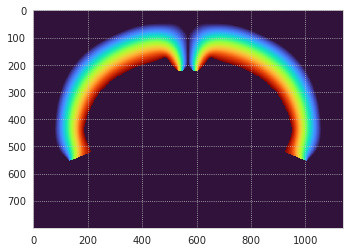

In [10]:
plt.imshow(laplacian[600], cmap='turbo')

In [11]:
boundary, boundary_header = nrrd.read(pjoin(path, 'isocortex_boundary_10.nrrd'))

In [22]:
import h5py

In [45]:
with h5py.File(pjoin(path, 'top_view_paths_10.h5'), 'r') as f:
    paths = np.array(f['paths'])
    view = np.array(f['view lookup'])
paths.shape, view.shape

((713732, 200), (1320, 1140))

<matplotlib.colorbar.Colorbar object at 0x7f3296611790>

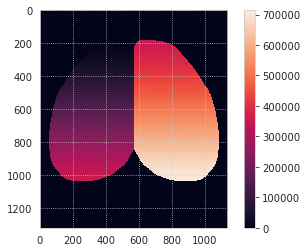

In [53]:
plt.imshow(view)
plt.colorbar()

In [51]:
with h5py.File(pjoin(path, 'dorsal_flatmap_paths_10.h5'), 'r') as f:
    dorsal_paths = np.array(f['paths'])
    dorsal_view = np.array(f['view lookup'])
dorsal_paths.shape, dorsal_view.shape

((2029520, 200), (1360, 2720))

<matplotlib.image.AxesImage object at 0x7f329664e970>

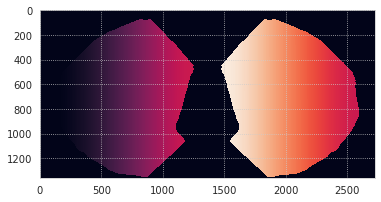

In [52]:
plt.imshow(dorsal_view)